In [26]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score


In [2]:
#ls

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
cd drive/MyDrive/SIAP/dataset/clean

/content/drive/MyDrive/SIAP/dataset/clean


In [8]:
df_train = pd.read_csv('train_clean_removed_emoticons.csv')
df_validation = pd.read_csv('validation_clean_removed_emoticons.csv')

X_train = df_train['Review Text']
y_train = df_train['Rating']
X_validation = df_validation['Review Text']
y_validation = df_validation['Rating']

In [9]:
len(X_train)

18113

In [10]:
#Hyper parameters

vocab_size = 10000
embedding_dim = 100
max_length = 150
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
#training_size = 18000

In [11]:
len('This outfit was online for months with no review so i was skeptical to order but very glad i did as it is better in person. it is beautiful, high quality tommy bahama inspired suit. i am 55 so short shorts are risky even though i am a typical size 4 or 6. i took a 4 in the blazer and i am typically a high 4 or low 6 in size so i would say the blazer is very true to size. i took the size 8 in the shorts as i felt they ran small and i wanted the extra length. they ride a bit lower on my waist an')

498

In [12]:
len('This outfit was online for months with no review so i was skeptical to order but very glad i did as it is better in person. it is beautiful, high quality tommy bahama inspired suit. i am 55 so short shorts are risky even though i am a typical size 4 or 6. i took a 4 in the blazer and i am typically a high 4 or low 6 in size so i would say the blazer is very true to size. i took the size 8 in the shorts as i felt they ran small and i wanted the extra length. they ride a bit lower on my waist an'.split())

112

In [13]:
# convert df to list

sentences_training = df_train['Review Text'].astype(str).str.lower().values.tolist()
labels_training = df_train['Rating'].values.tolist()

sentences_validation = df_validation['Review Text'].astype(str).str.lower().values.tolist()
labels_validation = df_validation['Rating'].values.tolist()

In [14]:
training_sentences = sentences_training
validation_sentences = sentences_validation
training_labels = labels_training
validation_labels = labels_validation

In [15]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [16]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
validation_padded = np.array(validation_padded)
validation_labels = np.array(validation_labels)

In [33]:
from tensorflow.keras.utils import to_categorical

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    #tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Bidirectional(LSTM(16, return_sequences=True)),
    tf.keras.layers.Bidirectional(LSTM(16)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(list(set(training_labels))) + 1, activation="softmax")
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [34]:
num_epochs = 30
history = model.fit(training_padded, to_categorical(training_labels), epochs=num_epochs, validation_data=(validation_padded, to_categorical(validation_labels)), verbose=2)

Epoch 1/30
567/567 - 77s - loss: 1.0980 - accuracy: 0.5826 - val_loss: 0.9302 - val_accuracy: 0.6158 - 77s/epoch - 136ms/step
Epoch 2/30
567/567 - 68s - loss: 0.8736 - accuracy: 0.6401 - val_loss: 0.9318 - val_accuracy: 0.6154 - 68s/epoch - 120ms/step
Epoch 3/30
567/567 - 68s - loss: 0.7973 - accuracy: 0.6692 - val_loss: 0.9180 - val_accuracy: 0.6256 - 68s/epoch - 120ms/step
Epoch 4/30
567/567 - 68s - loss: 0.7320 - accuracy: 0.6946 - val_loss: 0.9911 - val_accuracy: 0.6194 - 68s/epoch - 120ms/step
Epoch 5/30
567/567 - 68s - loss: 0.6792 - accuracy: 0.7219 - val_loss: 1.0440 - val_accuracy: 0.6176 - 68s/epoch - 120ms/step
Epoch 6/30
567/567 - 68s - loss: 0.6281 - accuracy: 0.7415 - val_loss: 1.0002 - val_accuracy: 0.6048 - 68s/epoch - 120ms/step
Epoch 7/30
567/567 - 68s - loss: 0.5772 - accuracy: 0.7701 - val_loss: 1.0568 - val_accuracy: 0.6114 - 68s/epoch - 120ms/step
Epoch 8/30
567/567 - 68s - loss: 0.5410 - accuracy: 0.7852 - val_loss: 1.1701 - val_accuracy: 0.5729 - 68s/epoch - 120

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


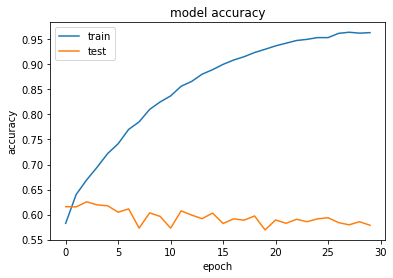

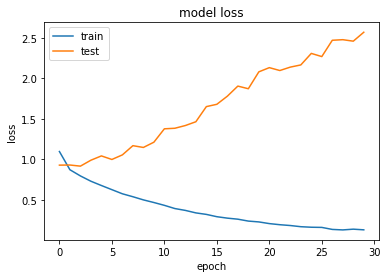

In [36]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

TEST

In [37]:
test = pd.read_csv('validation_clean_removed_emoticons.csv')
test_text = test["Review Text"].values
test_text = [str(x).lower() for x in test_text]

sequences = tokenizer.texts_to_sequences(test_text)
data = pad_sequences(sequences, maxlen=max_length)

y_test = test["Rating"].values

In [38]:
p = model.predict(data)
y_pred = []
for prediction in p:
    y_pred.append(np.argmax(prediction, axis=0))

In [39]:
print(confusion_matrix(y_test, y_pred))

[[   0    0    0    0   82]
 [   0    0    0    0  157]
 [   0    0    0    0  282]
 [   0    0    0    0  495]
 [   0    0    0    0 1246]]


In [ ]:
print(classification_report(y_train.values, y_pred))

In [41]:
print(f1_score(y_test, y_pred, average="micro"))

0.5508399646330681
